In [1]:
# Import libraries
import pandas as pd
import numpy as np
import json
import umap
import matplotlib.pyplot as plt

In [2]:
# read VDjdb dataset
VDJdb = pd.read_csv("vdjdb.txt", sep = "\t")

method = VDJdb['method']

method_dict_component = []
for row in range(0, method.index.stop, 1):
    method_dict_component.append(json.loads(method[row])['frequency'])
    
VDJdb['frequency'] = method_dict_component
display(VDJdb)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,frequency
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no,
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no,
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no,
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89316,0,TRB,CASSDWGSAETLYF,TRBV13-3*01,TRBJ2-3*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PMID:29150238,"{""frequency"": ""1//75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CASSDWGSAETLYF"", ""cdr3_old"": ""CASSDW...",0,sort,sanger,no,no,1//75
89317,0,TRA,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PMID:29150238,"{""frequency"": ""48//86"", ""identification"": ""tet...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CAARGYNQGKLIF"", ""cdr3_old"": ""CAARGYN...",1,sort,sanger,no,no,48//86
89318,0,TRA,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PMID:29150238,"{""frequency"": ""36//86"", ""identification"": ""tet...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CATSDTNAYKVIF"", ""cdr3_old"": ""CATSDTN...",1,sort,sanger,no,no,36//86
89319,0,TRA,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,MusMusculus,H-2Db,B2M,MHCI,SQLLNAKYL,...,PMID:29150238,"{""frequency"": ""1//86"", ""identification"": ""tetr...","{""cell.subset"": ""CD8"", ""clone.id"": """", ""donor....","{""cdr3"": ""CALSDTGANTGKLTF"", ""cdr3_old"": ""CALSD...",0,sort,sanger,no,no,1//86


In [3]:
# To get the data structure as TCRdist requireabs
# To process the data frame, separate the TRA and TRB. and select all rows of HomoSpaiens
VDJdb_TRA_TRB = VDJdb[['gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.species']]
#VDJdb_full = VDJdb_full[["species", "cdr3.alpha", "v.alpha", "j.alpha", "cdr3.beta", "v.beta", "j.beta"]]


VDJdb_TRA = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRA"]
VDJdb_TRB = VDJdb_TRA_TRB[ VDJdb_TRA_TRB['gene'] == "TRB"]

VDJdb_TRA_human = VDJdb_TRA[ VDJdb_TRA['species'] == "HomoSapiens"]
VDJdb_TRB_human = VDJdb_TRB[ VDJdb_TRB['species'] == "HomoSapiens"]
VDJdb_TRA_mouse = VDJdb_TRA[ VDJdb_TRA['species'] == "MusMusculus"]
VDJdb_TRB_mouse = VDJdb_TRB[ VDJdb_TRB['species'] == "MusMusculus"]
#VDJdb_TRA_TRB_human = VDJdb_full[ VDJdb_full['species'] == "HomoSapiens"]
#VDJdb_TRA_TRB_mouse = VDJdb_full[ VDJdb_full['species'] == "MusMusculus"]


VDJdb_TRA_human_GIANA =  VDJdb_TRA_human[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope', 'antigen.species']]
VDJdb_TRB_human_GIANA =  VDJdb_TRB_human[['cdr3', 'v.segm', 'j.segm', 'antigen.epitope', 'antigen.species']]

display(VDJdb_TRA_human_GIANA)
display(VDJdb_TRB_human_GIANA)

VDJdb_TRA_human_GIANA.to_csv('VDJdb_TRA_human_GIANA.txt', sep='\t', index=False)
VDJdb_TRB_human_GIANA.to_csv('VDJdb_TRB_human_GIANA.txt', sep='\t', index=False)

,cdr3,v.segm,j.segm,antigen.epitope,antigen.species
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEKGGL,HIV-1
3,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,FLKEKGGL,HIV-1
5,CAVKASGSRLT,TRAV2*01,NaN,FLKEKGGL,HIV-1
7,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,FLKEKGGL,HIV-1
9,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,FLKEQGGL,HIV-1
...,...,...,...,...,...
89068,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,QYIKWPWYI,SARS-CoV-2
89070,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,QYIKWPWYI,SARS-CoV-2
89072,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,QYIKWPWYI,SARS-CoV-2
89075,CLVGENSGGFKTIF,TRAV4*01,TRAJ9*01,QYIKWPWYI,SARS-CoV-2


,cdr3,v.segm,j.segm,antigen.epitope,antigen.species
1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,HIV-1
2,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,HIV-1
4,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,HIV-1
6,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,HIV-1
8,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL,HIV-1
...,...,...,...,...,...
89069,CASSALVAFSTDTQYF,TRBV6-4*01,TRBJ2-3*01,QYIKWPWYI,SARS-CoV-2
89071,CASSSLAGEVNEQFF,TRBV7-2*01,TRBJ2-1*01,QYIKWPWYI,SARS-CoV-2
89073,CASSSYTQRGLDYTGELFF,TRBV27*01,TRBJ2-2*01,QYIKWPWYI,SARS-CoV-2
89074,CSVEDPMGVGTEAFF,TRBV29-1*01,TRBJ1-1*01,QYIKWPWYI,SARS-CoV-2


In [4]:
Encoding_Matrix = pd.read_csv('VDJdb_TRA_human_GIANA--RotationEncodingBL62.txt_EncodingMatrix.txt', sep='\t', header=None)
display(Encoding_Matrix)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,CAAADNYGQNFVF,TRAV12-2*01,TRAJ26*01,QARQMVQAMRTIGTHP,InfluenzaA,-0.422125,0.122257,0.162796,0.600990,0.197342,...,0.107914,0.130335,0.342940,-0.703101,-0.132454,0.486611,0.084516,-0.699910,0.040827,-0.472049
1,CAAADNYGQNFVF,TRAV25*01,TRAJ26*01,AVFDRKSDAK,EBV,-0.422125,0.122257,0.162796,0.600990,0.197342,...,0.107914,0.130335,0.342940,-0.703101,-0.132454,0.486611,0.084516,-0.699910,0.040827,-0.472049
2,CAAAETSYDKVIF,TRAV13-1*01,TRAJ50*01,RAKFKQLL,EBV,0.408501,-0.463889,-0.397330,-0.019729,0.511896,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
3,CAAAGAGSYQLTF,TRAV8-1*01,TRAJ28*01,KLGGALQAK,CMV,-0.312309,-0.535722,-0.019499,-0.122113,-0.709479,...,0.534093,0.548508,0.594903,0.326693,-0.453553,-0.563170,-0.554163,0.181178,-0.716009,-0.089898
4,CAAAGDNNRKLIW,TRAV13-1*01,TRAJ38*01,NLVPMVATV,CMV,0.185993,-0.440178,-0.447695,0.343410,0.446036,...,-0.335624,0.170363,0.423411,0.466816,-0.503472,-0.379369,0.149482,0.321768,0.285847,0.684699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25817,CAVVRGISRWHQNAGGTSYGKLTF,TRAV39*01,TRAJ52*01,GILGFVFTL,InfluenzaA,0.301552,-0.064046,-0.187557,-0.537442,-0.291040,...,0.229720,0.602587,1.089717,0.552381,-1.046081,-0.566579,-1.529891,0.637558,-0.967118,0.732054
25818,CAYRSLSGKPTAMNSGGSNYKLTF,TRAV38-2/DV8*01,TRAJ53*01,RLRAEAQVK,EBV,-0.053858,-1.025117,-0.767975,0.102018,0.556228,...,0.236451,-0.146666,-1.200385,0.321851,-0.002531,0.769186,-0.119001,0.495226,-1.222027,0.046767
25819,CGRQMLLFTTVLYTKAGNNRKLIW,TRAV30*01,TRAJ38*01,KLGGALQAK,CMV,0.373396,-0.376465,-0.527653,0.751014,-0.313194,...,-0.241636,-0.343684,-1.324542,-0.016619,-0.990883,0.464504,0.970621,-0.885797,-1.029290,0.853739
25820,CAASSMSQRNFNAGGTSYGKLTF,TRAV13-1*01,TRAJ52*01,KLGGALQAK,CMV,-0.145571,-0.464259,-0.054241,0.746817,1.105179,...,0.652018,-0.400052,0.414997,0.484408,0.044307,0.371172,-1.209431,0.587467,-0.518077,0.621964


In [5]:
from scipy.spatial import distance_matrix

#Distance_matrix_by_GIANA = pd.read_csv('Distance_matrix_TRA_by_GIANA.csv')
#Distance_matrix_by_GIANA_array = Distance_matrix_by_GIANA.iloc[:, 1:].to_numpy()


Processed_dataset_by_GIANA = pd.read_csv('Processed_TRA_by_GIANA.csv')
display(Processed_dataset_by_GIANA)

Distance_Matrix_by_GIANA_array = distance_matrix(Processed_dataset_by_GIANA.iloc[:, 7:].to_numpy(), 
                                                Processed_dataset_by_GIANA.iloc[:, 7:].to_numpy())

#Distance_Matrix_by_GIANA_array = distance_matrix(Encoding_Matrix.iloc[0:5000, 5:].to_numpy(), 
#                                                Encoding_Matrix.iloc[0:5000, 5:].to_numpy())

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V6.1,V7,V8,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
0,CAAGWVSQGNLIF,CAAGWVSQGNLIF,1,TRAV1-1*01,TRAJ42*01,KLGGALQAK,CMV,0.685463,0.225814,-0.325718,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
1,CAAGWVSQGNLIF.1,CAAGWVSQGNLIF,1,TRAV1-1*01,TRAJ42*01,RLRAEAQVK,EBV,0.685463,0.225814,-0.325718,...,0.161617,0.083978,0.091194,0.345470,-0.294153,0.298919,-0.608347,0.594359,-0.294738,0.486415
2,CAARVTAGTALIF,CAARVTAGTALIF,2,TRAV13-1*01,TRAJ15*01,RLRAEAQVK,EBV,0.408501,-0.463889,-0.397330,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
3,CAARVTAGTALIF.1,CAARVTAGTALIF,2,TRAV13-1*01,TRAJ15*01,KLGGALQAK,CMV,0.408501,-0.463889,-0.397330,...,0.027839,0.026379,-0.417603,0.218099,0.535328,0.048330,0.078777,0.504649,-0.269721,-0.524168
4,CAASAGVDDKIIF,CAASAGVDDKIIF,3,TRAV29/DV5*01,TRAJ30*01,AVFDRKSDAK,EBV,-0.330413,-0.438601,-0.550938,...,0.047840,-0.530679,-0.500499,0.368742,0.224292,0.461648,0.111592,-0.268280,-0.393728,-0.409874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,CALSRPGANAGGTSYGKLTF.1,CALSRPGANAGGTSYGKLTF,3600,TRAV9-2*01,TRAJ52*01,AVFDRKSDAK,EBV,0.078088,-0.902490,-0.948268,...,0.189456,0.110358,-0.326408,0.563569,0.241174,0.347249,-0.529570,1.099008,-0.564459,-0.037753
13983,CIVRVVERTVSHTNAGKSTF,CIVRVVERTVSHTNAGKSTF,3601,TRAV26-1*01,TRAJ27*01,AVFDRKSDAK,EBV,0.819841,-0.328765,0.227593,...,-0.828453,0.793406,0.327659,0.767971,-0.404337,-0.221622,-0.794437,0.216708,0.340671,1.068798
13984,CIVRVVERTVSHTNAGKSTF.1,CIVRVVERTVSHTNAGKSTF,3601,TRAV26-1*01,TRAJ27*01,KLGGALQAK,CMV,0.819841,-0.328765,0.227593,...,-0.828453,0.793406,0.327659,0.767971,-0.404337,-0.221622,-0.794437,0.216708,0.340671,1.068798
13985,CAAIPVRNGRMNYGGSQGNLIF,CAAIPVRNGRMNYGGSQGNLIF,3602,TRAV29/DV5*01,TRAJ42*01,GILGFVFTL,InfluenzaA,-0.660825,-0.877201,-1.101875,...,-0.484122,0.395205,-0.749790,0.869585,-0.586457,0.291919,-0.971622,-0.284567,-0.042783,0.375740


In [6]:
display(Distance_Matrix_by_GIANA_array)

array([[0.        , 0.        , 6.12482055, ..., 7.29633145, 6.85470209,
        6.85470209],
       [0.        , 0.        , 6.12482055, ..., 7.29633145, 6.85470209,
        6.85470209],
       [6.12482055, 6.12482055, 0.        , ..., 6.71952992, 7.9358288 ,
        7.9358288 ],
       ...,
       [7.29633145, 7.29633145, 6.71952992, ..., 0.        , 8.13971484,
        8.13971484],
       [6.85470209, 6.85470209, 7.9358288 , ..., 8.13971484, 0.        ,
        0.        ],
       [6.85470209, 6.85470209, 7.9358288 , ..., 8.13971484, 0.        ,
        0.        ]])

[ 0  4  4 ...  0 15 15]


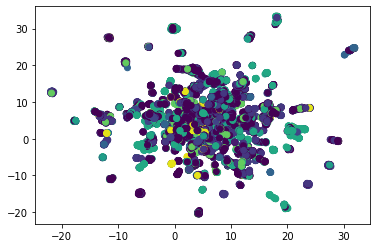

In [9]:
umap_TRA = umap.UMAP(random_state=42, n_components=2, min_dist=0.4)

VDJ_test = Processed_dataset_by_GIANA
#VDJ_test = Encoding_Matrix

TRA_epitope_label = VDJ_test['V6']
#TRA_epitope_label = VDJ_test.iloc[0:5000,4]
TRA_epitope_label = pd.Categorical(TRA_epitope_label).codes
print(TRA_epitope_label)

#Processed_datase_by_GIANA_array = Processed_dataset_by_GIANA.iloc[:, 7:].to_numpy()
#Distance_Matrix_by_GIANA_array = Encoding_Matrix.iloc[:,5:]
TRA_umap_fit = umap_TRA.fit_transform(Distance_Matrix_by_GIANA_array)

plt.scatter(TRA_umap_fit[:,0], TRA_umap_fit[:,1], c=TRA_epitope_label)

In [12]:
TRA_epitope_label = list(set(TRA_epitope_label))
label_len = len(TRA_epitope_label)
print(label_len)

26


In [ ]:
from sklearn import cluster
Kmeans_cluster= cluster.KMeans(n_clusters = label_len, random_state = 42)
cluster_labels = Kmeans_cluster.fit_predict(TRA_umap_fit)

In [ ]:
print(cluster_labels)
one_label_9 = TRA_umap_fit[cluster_labels==9]
one_label_23 = TRA_umap_fit[cluster_labels==23]
plt.scatter(one_label_9[:,0], one_label_9[:,1], c='red')
plt.scatter(one_label_23[:,0], one_label_23[:,1], c='blue')

In [ ]:
for label in set(cluster_labels):
    plt.scatter(TRA_umap_fit[cluster_labels == label ,0], 
              TRA_umap_fit[cluster_labels == label,1], label=label)
plt.legend()
plt.show()